<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Mécanique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Référentiels non galiléens | Déviation vers l'Est
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
from scipy.integrate import odeint
from scipy import fft
import matplotlib.pyplot as plt

# Mise en œuvre du problème physique
##  Le référentiel Terrestre non galiléen
### Modélisation du problème à traiter
Du fait de la rotation propre de la Terre autour d'un axe nord-sud, le référentiel "du laboratoire", noté $\mathcal{R}_\text{lab}$ généralement considéré comme galiléen ne l'est pas en toute rigueur. Il faut donc ajouter, au bilan des forces usuel,la force dite de Coriolis : 
$$\vec{F}=-2m\vec{\omega}_T\wedge\vec{v}$$
où $\vec{\omega}_T$ est la vitesse angulaire de la Terre autour de son axe et $\vec{v}$ la vitesse du système étudié dans le référentiel du laboratoire (donc ici non galiléen).

&nbsp;
Afin de bien comprendre les diverses projections en jeu, on représente sur un schéma les divers points de vue sur le problème que nous allons traiter :
<img src="fig1.png" style="height:350px">
Sur ce shéma le point $M$ représente le laboratoire où a lieu l'expérience, le point $O$ est le centre de la Terre. Notre planète tourne autour de l'axe noté *Nord* avec la vitesse angulaire $\omega_T=\frac{2\pi}{T}$ où $T=86140~\text{s}$, et l'angle $\lambda$ est la latitude à laquelle se trouve le laboratoire ($\lambda\simeq 49°$ pour Paris).

&nbsp;
Dans le référentiel du laboratoire, l'axe orienté de $M$ vers $O$ représente la verticale, c'est pourquoi nous le noterons $Oz$, l'axe de vecteur unitaire $\vec{u}_y$ donne la direction de l'Est, et l'axe de vecteur unitaire $\vec{u}_x$ celle du Sud. Ainsi, en ne retenant que la partie qui nous concerne de ce schéma, on peut le simplifier :
&nbsp;
<img src="fig2.png" style="height:220px">

### Mise en équation

Dans la base de projection cartésienne $(O',x,y,z)$ associée au référentiel $\mathcal{R}_\text{lab}$, le principe fondamental de la dynamique devient : 
$$m\left(\begin{array}{c}\ddot{x} \\ \ddot{y} \\ \ddot{z}\end{array}\right)=\left(\begin{array}{c} 0 \\ 0 \\ -mg\end{array}\right)-2m\left(\begin{array}{c}-\omega_T\cos\lambda \\ 0 \\ \omega_T\sin\lambda\end{array}\right)\wedge\left(\begin{array}{c}\dot{x} \\ \dot{y} \\ \dot{z}\end{array}\right)$$

&nbsp;
Soit encore, après développement du produit vectoriel : 
$$m\left(\begin{array}{c}\ddot{x} \\ \ddot{y} \\ \ddot{z}\end{array}\right)=\left(\begin{array}{c} 0 \\ 0 \\ -mg\end{array}\right)-2m\omega_T\left(\begin{array}{c}-\dot{y}\sin\lambda \\ \dot{x}\sin\lambda+\dot{z}\cos\lambda \\ -\dot{y}\cos\lambda \end{array}\right)$$

### Méthode numérique appliquée
Afin de résoudre cette équation différentielle couplée, nous allons utiliser la méthode `odeint` de la librairie `scipy`. Elle permet de résoudre les équations différentielles écrites sous la forme $\frac{\text{d}}{\text{d}t}X=f(X,t)$ de façon plus précise que la méthode d'Euler à discrétisation identique.

&nbsp;
Le vecteur $X$ sera notée `xv` et devra donc contenir les 3 positions et les trois vitesses, soit :
$$X=\left[\begin{array}{c}x\\y\\z\\ \dot{x}\\ \dot{y}\\ \dot{z} \end{array}\right]$$

&nbsp;
La fonction $f$ sera notée `def_est(xv,t)` et renverra alors :
$$f(X,t)=\left[\begin{array}{c}\dot{x}\\ \dot{y} \\ \dot{z} \\ 2\omega_T\dot{y}\sin\lambda \\ -2\omega_T(\dot{x}\sin\lambda+\dot{z}\cos\lambda ) \\-g +2\omega_T\dot{y}\cos\lambda \end{array}\right]$$


In [2]:
# Données propres au système stable
m = 1.      # masse du système
g = 9.81 # accélération de pesanteur supposée uniforme
T = 86140 # période de rotation propre de la Terre
omega_T = 2*np.pi/T # vitesse angulaire propre de la Terre
lambda_T = 49*np.pi/180 # latitude de Paris
R_T =6.3672e6 # rayon de la Terre

In [3]:
Tmax = 10 # Durée maximale de la chute étudiée
Num = 1000000 # Nombre d'intervalles retenus pour l'étude numérique
t = np.linspace(0,Tmax,Num) # vecteur instants t

xv0=[0,0,160,0,0,0] # conditions initiales sous la forme [x0,y0,z0,vx0,vy0,vz0] selon schéma

def dev_est(xv,t):
    return [xv[3], xv[4], xv[5], 0+2*omega_T*np.sin(lambda_T)*xv[4], 0-2*omega_T*(xv[3]*np.sin(lambda_T)+xv[5]*np.cos(lambda_T)),-g + 2*omega_T*np.cos(lambda_T)*xv[4]]

In [4]:
xv = odeint(dev_est,xv0,t) # résolution de l'équation différentielle

x,y,z = xv[:,0], xv[:,1], xv[:,2] # extraction des résultats de position
dotx,doty,dotz = xv[:,3], xv[:,4], xv[:,5] # extraction des résultats de vitesse

ind=np.argmin(abs(z)) # recherche de l'indice ou z=0, en recherchant le min de |z|
print("Le point d'impact retenu a pour hauteur ", format(z[ind],"#.2e"), "m")

Le point d'impact retenu a pour hauteur  -1.76e-04 m


Comme la valeur de la déviation vers l'Est est très faible, on veillera à ce que l'indice retenu pour déterminer l'instant d'impact donne une hauteur résiduelle plus faible que celle de la déviation vers l'Esr calculée plus loin. 

&nbsp; 
Dans le cas contraire, il suffit d'augmenter la valeur de la variable `Num` pour y parvenir.

### Trajectoires et valeur de la déviation vers l'Est
Les lois horaires calculées, il ne reste qu'à exploiter les données précédentes.
On commence par tracer la loi horaire de la chute libre jusqu'à l'instant d'impact approché, calculé à l'étape précédente.

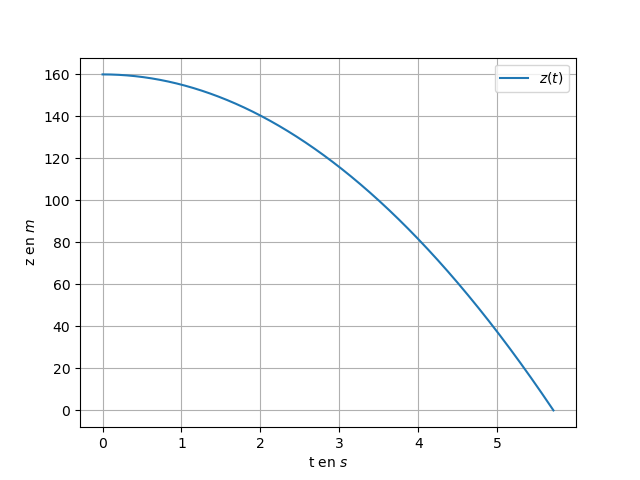

La durée calculée de la chute est de  5.711e+00 s
La durée théorique d'une chute libre sans prise en compte des forces de Coriolis est  5.711e+00 s


In [5]:
plt.figure('Loi horaire de la chute libre')
plt.plot(t[:ind],z[:ind], label=r"$z(t)$")
plt.legend()
plt.xlabel(r"t en $s$")
plt.ylabel(r"z en $m$")
plt.grid(True)
plt.show()

print("La durée calculée de la chute est de ", format(t[ind], "#.3e"), "s")
print("La durée théorique d'une chute libre sans prise en compte des forces de Coriolis est ", format(np.sqrt(2*xv0[2]/g), "#.3e"),"s")

On trace ensuite la projection de la trajectoire sur le plan $Ozy$ pour évaluer la valeur de la déviation vers l'Est que l'on compare avec une valeur approchée dont le calcul est développé dans le BUP (voir <a href="http://bupdoc.udppc.asso.fr/consultation/article-bup.php?ID_fiche=14436">ici</a>)

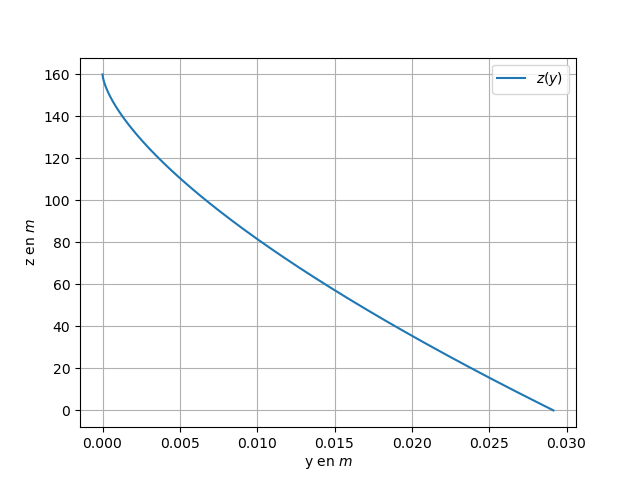

La déviation vers l'Est calculée est de  2.915e-02 m
La déviation vers l'Est théorique approchée est de  2.915e-02 m


In [6]:
plt.figure("Déviation vers l'Est lors de la chute libre")
plt.plot(y[:ind],z[:ind], label=r"$z(y)$")
plt.legend()
plt.xlabel(r"y en $m$")
plt.ylabel(r"z en $m$")
plt.grid(True)
plt.show()

print("La déviation vers l'Est calculée est de ", format(y[ind], "#.3e"), "m")
print("La déviation vers l'Est théorique approchée est de ", format(omega_T*np.cos(lambda_T)/3*np.sqrt(8*xv0[2]**3/g), "#.3e"),"m")

On peut alors lancer plusieurs simulations et comparer les valeurs numériques, théoriques et expérimentales disponibles

In [7]:
manip_BUP=[['Reich','Freiberg'],['Hall','Harvard'],['Flammarion','Paris']]
result_BUP=[28.3e-3, 1.5e-3, 7.61e-3]
lambda_T_BUP=[50.92*np.pi/180, 39*np.pi/180, 48.85*np.pi/180]
xv0_BUP=[[0,0,158,0,0,0], [0,0,23,0,0,0], [0,0,68,0,0,0]]

In [8]:
for i in range(len(xv0_BUP)):
    xv0, lambda_T = xv0_BUP[i], lambda_T_BUP[i]
    xv_BUP = odeint(dev_est,xv0,t)
    x_BUP,y_BUP,z_BUP = xv_BUP[:,0], xv_BUP[:,1], xv_BUP[:,2]
    ind_BUP=np.argmin(abs(z_BUP))
    print("La déviation vers l'Est calculée pour l'expérience de ",manip_BUP[i][0]," dans la ville de ",manip_BUP[i][1]," est de ", format(y_BUP[ind_BUP], "#.3e"), "m")
    print("La déviation vers l'Est mesurée pour l'expérience de ",manip_BUP[i][0]," dans la ville de ",manip_BUP[i][1]," est de ", format(result_BUP[i], "#.3e"), "m")
    print("La déviation vers l'Est théorique approchée est de ", format(omega_T*np.cos(lambda_T)/3*np.sqrt(8*xv0[2]**3/g), "#.3e"),"m")
    print("---")

La déviation vers l'Est calculée pour l'expérience de  Reich  dans la ville de  Freiberg  est de  2.749e-02 m
La déviation vers l'Est mesurée pour l'expérience de  Reich  dans la ville de  Freiberg  est de  2.830e-02 m
La déviation vers l'Est théorique approchée est de  2.749e-02 m
---
La déviation vers l'Est calculée pour l'expérience de  Hall  dans la ville de  Harvard  est de  1.882e-03 m
La déviation vers l'Est mesurée pour l'expérience de  Hall  dans la ville de  Harvard  est de  1.500e-03 m
La déviation vers l'Est théorique approchée est de  1.882e-03 m
---
La déviation vers l'Est calculée pour l'expérience de  Flammarion  dans la ville de  Paris  est de  8.102e-03 m
La déviation vers l'Est mesurée pour l'expérience de  Flammarion  dans la ville de  Paris  est de  7.610e-03 m
La déviation vers l'Est théorique approchée est de  8.102e-03 m
---


### Déviation vers le Sud
On fait de même sur le plan $Ozx$ pour évaluer la valeur de la déviation vers le Sud.

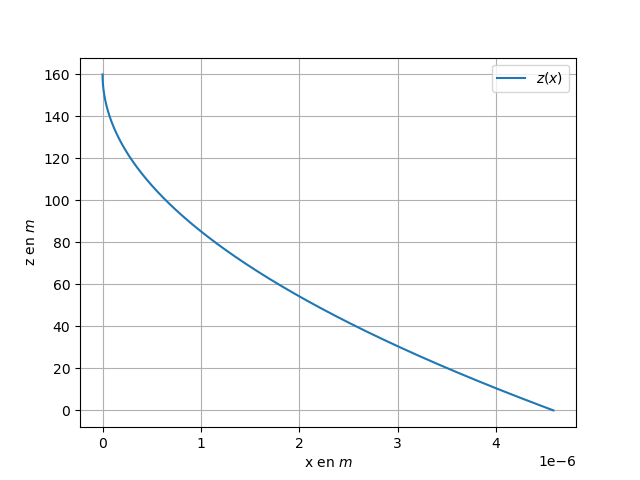

La déviation angulaire vers le Sud calculée est de  4.583e-06 m


In [9]:
plt.figure("Déviation vers le Sud lors de la chute libre")
plt.plot(x[:ind],z[:ind], label=r"$z(x)$")
plt.legend()
plt.xlabel(r"x en $m$")
plt.ylabel(r"z en $m$")
plt.grid(True)
plt.show()

print("La déviation angulaire vers le Sud calculée est de ", format(x[ind], "#.3e"), "m")

On peut également tracer la trajectoire 3D

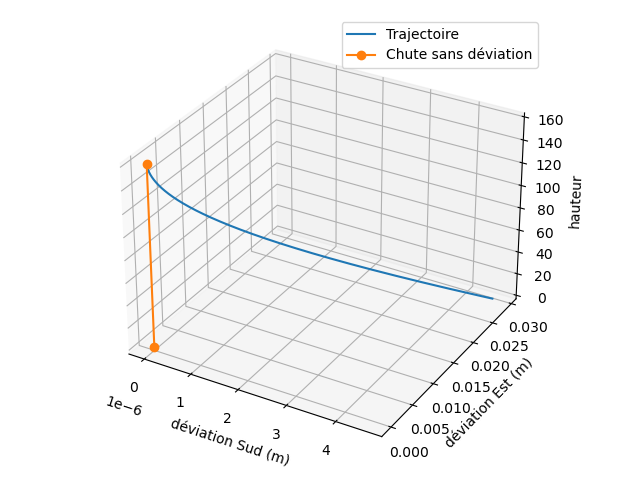

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot(x[:ind], y[:ind], z[:ind], label='Trajectoire')  # Tracé de la courbe 3D
ax.plot([0,0], [0,0], [z[0],z[ind]],'-o', label='Chute sans déviation')
plt.legend()
ax.set_xlabel('déviation Sud (m)')
ax.set_ylabel("déviation Est (m)")
ax.set_zlabel('hauteur')
plt.tight_layout()
plt.show()

### Influence d'un frottement fluide
En supposant que l'air est immobile dans le référentiel non galiléen $\mathcal{R}_\text{lab}$ utilisé, on peut étudier l'influence d'une force de frottement linéaire $\vec{f}_\alpha=-\alpha\vec{v}$ en l'ajoutant au PFD et donc à la fonction `dev_est`.


In [11]:
alpha=.1 # coefficient de frottement retenu

xv0=[0,0,160,0,0,0] # conditions initiales sous la forme [x0,y0,z0,vx0,vy0,vz0] selon schéma

def dev_est_alpha(xv,t):
    return [xv[3], xv[4], xv[5], 0 + 2*omega_T*np.sin(lambda_T)*xv[4]-alpha*xv[3]/m, 0-2*omega_T*(xv[3]*np.sin(lambda_T)+xv[5]*np.cos(lambda_T))-alpha*xv[4]/m,-g + 2*omega_T*np.cos(lambda_T)*xv[4]-alpha*xv[5]/m]

xv_alpha = odeint(dev_est_alpha,xv0,t) # résolution de l'équation différentielle

x_alpha,y_alpha,z_alpha = xv_alpha[:,0], xv_alpha[:,1], xv_alpha[:,2] # extraction des résultats de position

ind_alpha=np.argmin(abs(z_alpha)) # recherche de l'indice ou z=0, en recherchant le min de |z|
print("Le point d'impact retenu pour le calcul avec frottement a pour hauteur ", format(z_alpha[ind_alpha],"#.2e"), "m")
print("---")
print("Le temps de chute avec frottement est ",format(t[ind_alpha],"#.2e"), "s")
print("Le temps de chute sans frottement est ",format(t[ind],"#.2e"), "s")
print("L'écart relatif entre les deux valeurs est ",format(abs(100*(t[ind]-t[ind_alpha])/t[ind]),"#.1f"), "%")
print("---")
print("La déviation vers l'Est avec frottement est ",format(y_alpha[ind_alpha],"#.3e"), "m")
print("La déviation vers l'Est sans frottement est ",format(y[ind],"#.3e"), "m")
print("L'écart relatif entre les deux valeurs est ",format(abs(100*(y[ind]-y_alpha[ind_alpha])/y[ind]),"#.1f"), "%")

Le point d'impact retenu pour le calcul avec frottement a pour hauteur  -1.92e-04 m
---
Le temps de chute avec frottement est  6.31e+00 s
Le temps de chute sans frottement est  5.71e+00 s
L'écart relatif entre les deux valeurs est  10.5 %
---
La déviation vers l'Est avec frottement est  2.906e-02 m
La déviation vers l'Est sans frottement est  2.915e-02 m
L'écart relatif entre les deux valeurs est  0.3 %


On remarque que même si le temps de chute est notablement impacté par la force de frottement additionnelle, la valeur de la déviation vers l'Est ne change que très peu.